In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

1.Dataset Selection (5 Marks)  
Choose a dataset from Kaggle or other online repositories.   
Briefly describe the dataset in your notebook, including the context, number of rows and columns, and a short explanation of the columns.  

I have chosen the dataset named screentime_analysis.csv from kaggle which analyze app usages based on screentime. 

In [2]:
dataset = pd.read_csv("screentime_analysis.csv")
dataset.head()

,Date,App,Usage (minutes),Notifications,Times Opened
0,2024-08-07,Instagram,81,24,57
1,2024-08-08,Instagram,90,30,53
2,2024-08-26,Instagram,112,33,17
3,2024-08-22,Instagram,82,11,38
4,2024-08-12,Instagram,59,47,16


In [3]:
dataset.shape

(200, 5)

2. Basic Plots (40 Marks)  
Use Matplotlib to create the following visualizations from your chosen dataset:  
Line Plot: Show a trend or progression of a variable over time or another index. (10 Marks)  
Bar Chart: Compare categories or groups. (10 Marks)  
Scatter Plot: Illustrate relationships between two numeric variables. (10 Marks)  
Box Plot: Summarize the distribution and identify outliers of a numeric variable. (10 Marks)  

3. Customizing Plots (20 Marks)  
Add meaningful titles, labels, and legends to all the plots. (10 Marks)  
Experiment with colors and markers to make your plots more readable and visually appealing. (10 Marks)  

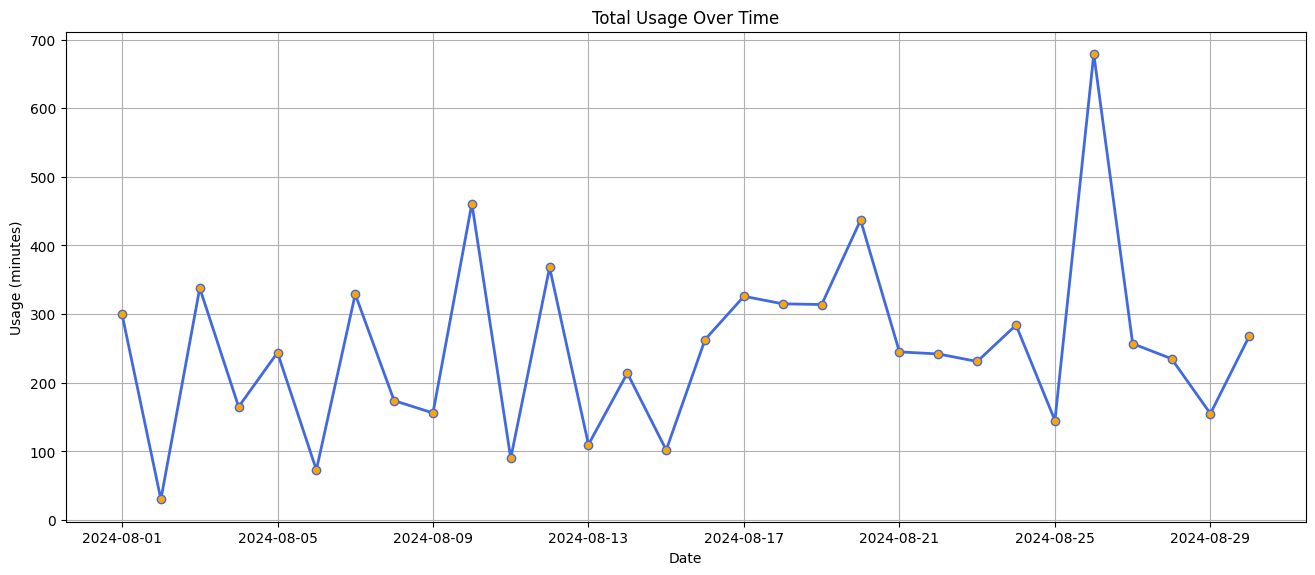

In [4]:
#creating a line plot of usage over time 
dataset['Date'] = pd.to_datetime(dataset['Date'])
date_grouped = dataset.groupby('Date').sum()
plt.figure(figsize=(16, 14))
plt.subplot(2, 1, 1)
plt.plot(
    date_grouped.index, 
    date_grouped['Usage (minutes)'], 
    color='royalblue', 
    linestyle='-', 
    linewidth=2, 
    marker='o', 
    markerfacecolor='orange', 
    markersize=6
)
plt.title('Total Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Usage (minutes)')
plt.grid(True)
plt.show()

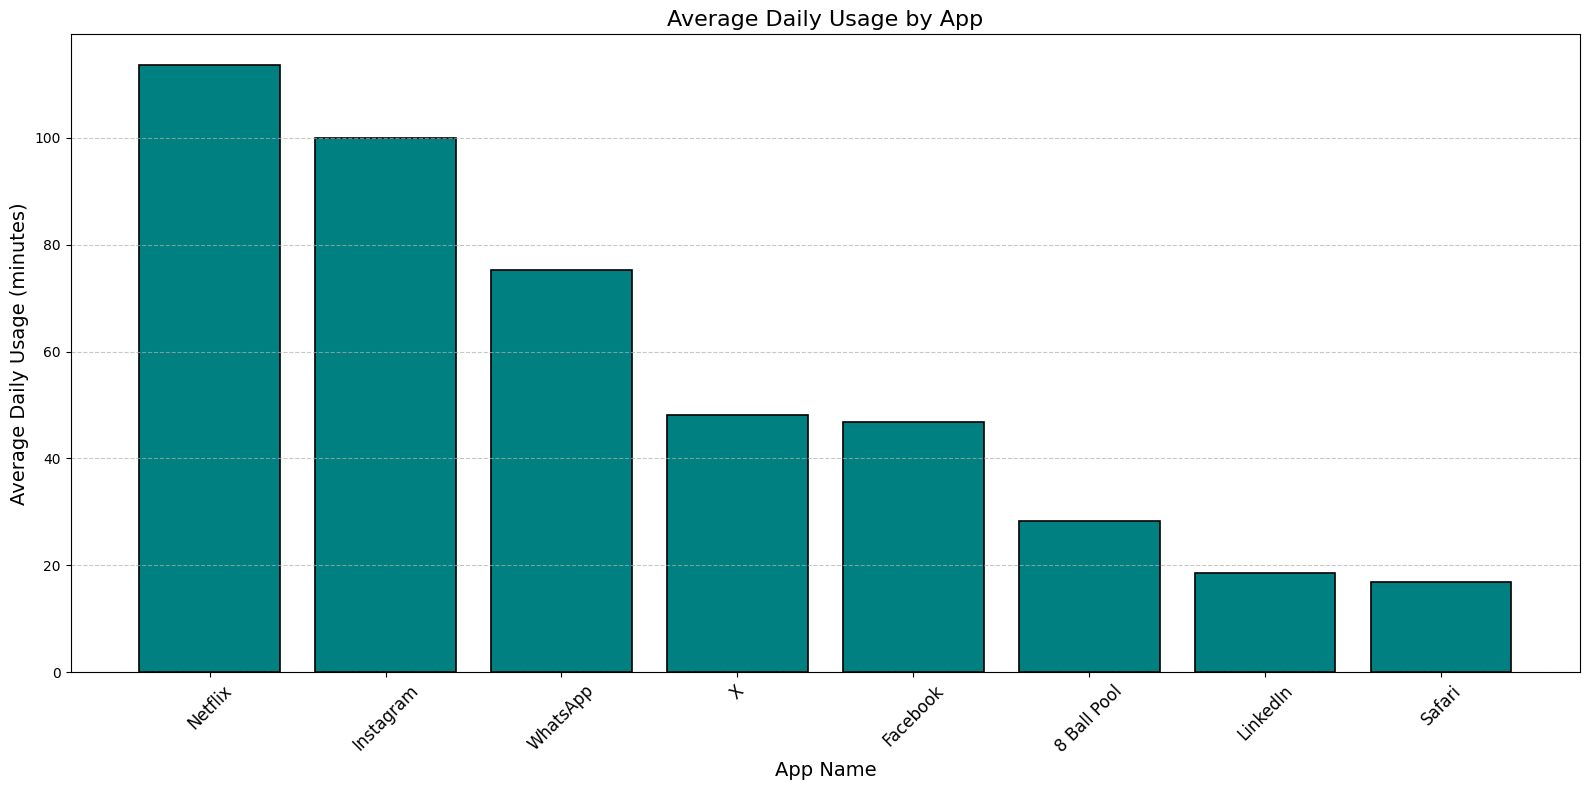

In [5]:
#creating a bar chart
daily_usage = dataset.groupby(['Date', 'App'])['Usage (minutes)'].sum().reset_index()
app_daily_avg = daily_usage.groupby('App')['Usage (minutes)'].mean().sort_values(ascending=False)
plt.figure(figsize=(16, 8))
plt.bar(app_daily_avg.index, app_daily_avg.values, color='teal', edgecolor='black', linewidth=1.2)
plt.title('Average Daily Usage by App', fontsize=16)
plt.xlabel('App Name', fontsize=14)
plt.ylabel('Average Daily Usage (minutes)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

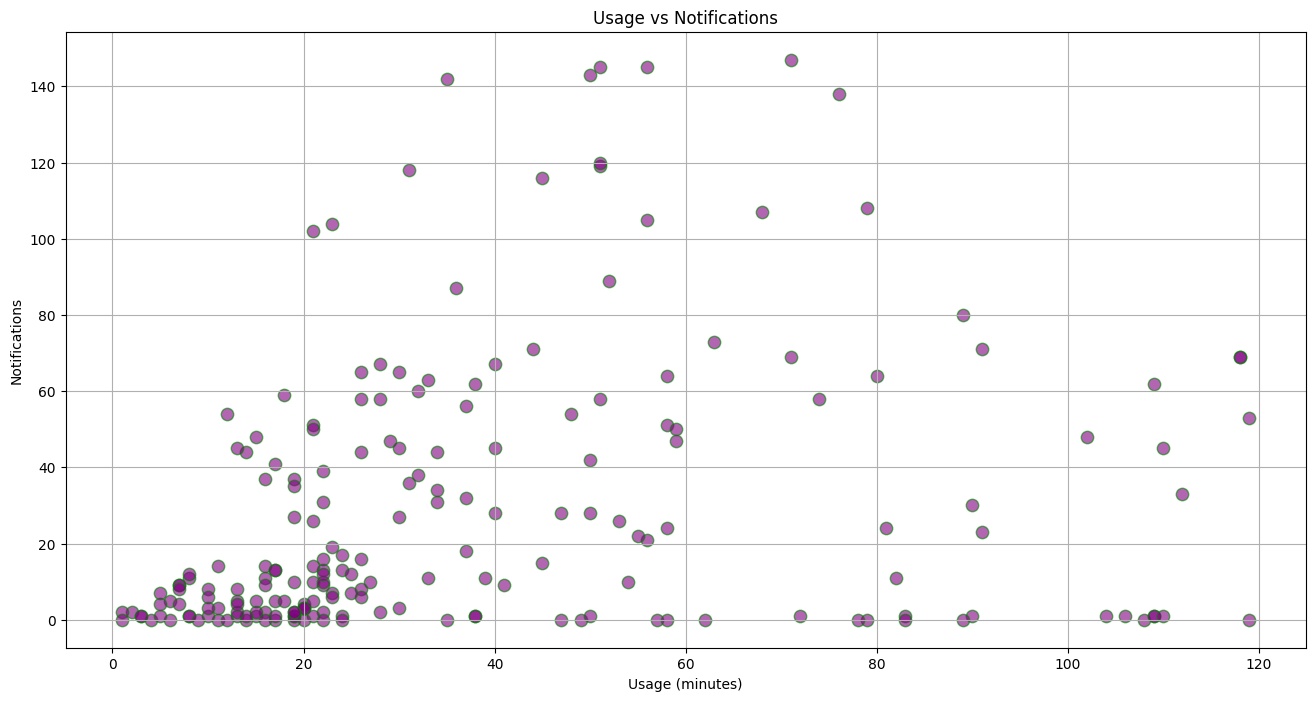

In [6]:
#creating a scatter plot
plt.figure(figsize=(16, 8))
plt.scatter(dataset['Usage (minutes)'], dataset['Notifications'], alpha=0.6, color='purple', edgecolor='green', s=80,marker='o')
plt.title('Usage vs Notifications')
plt.xlabel('Usage (minutes)')
plt.ylabel('Notifications')
plt.grid(True)

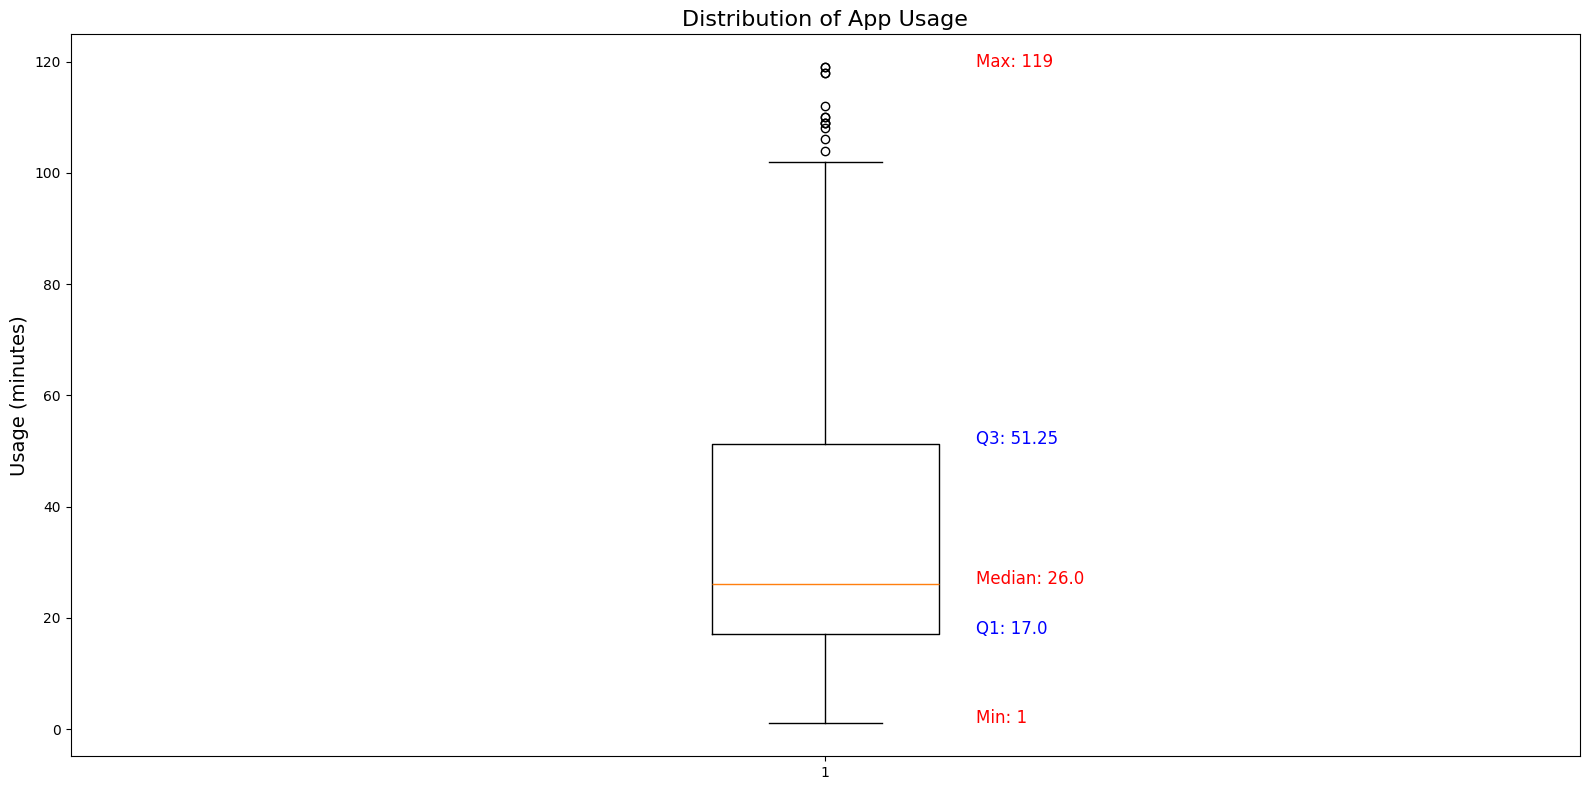

In [12]:
#creating a box plot
plt.figure(figsize=(16, 8))
boxplot = plt.boxplot(
    dataset['Usage (minutes)']
)
q1 = dataset['Usage (minutes)'].quantile(0.25)
median = dataset['Usage (minutes)'].median()
q3 = dataset['Usage (minutes)'].quantile(0.75)
min_val = dataset['Usage (minutes)'].min()
max_val = dataset['Usage (minutes)'].max()
plt.text(1.1, q1, f'Q1: {q1}', fontsize=12, color='blue')
plt.text(1.1, median, f'Median: {median}', fontsize=12, color='red')
plt.text(1.1, q3, f'Q3: {q3}', fontsize=12, color='blue')
plt.text(1.1, min_val, f'Min: {min_val}', fontsize=12, color='red')
plt.text(1.1, max_val, f'Max: {max_val}', fontsize=12, color='red')
plt.title('Distribution of App Usage', fontsize=16)
plt.ylabel('Usage (minutes)', fontsize=14)
plt.tight_layout()
plt.show()

4. Insights and Observations (15 Marks)  
For each plot:  
Write a brief note on what insights you can derive from the visualization.  